# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [39]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [40]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")

In [44]:
%matplotlib inline

import hvplot.pandas

## Load Data

In [45]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [46]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_types = ['single_detached_house', 
                  'apartment_five_storeys_plus', 
                  'semi_detached_house', 
                  'row_house', 
                  'duplex', 
                  'apartment_five_storeys_less', 
                  'other_house']

dwelling_grp_types = to_data.groupby('year')[dwelling_types].sum()                        
                        
dwelling_grp_types.head()

,single_detached_house,apartment_five_storeys_plus,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,
2001,300930,355015,90995,52355,23785,116900,3040
2006,266860,379400,69430,54690,44095,162850,1335
2011,274940,429220,72480,60355,44750,163895,2165
2016,269680,493270,71200,61565,48585,165575,2845


In [49]:
dwelling_grp_types.to_csv('Data/dwelling_grp_types.csv')

<AxesSubplot:xlabel='year'>

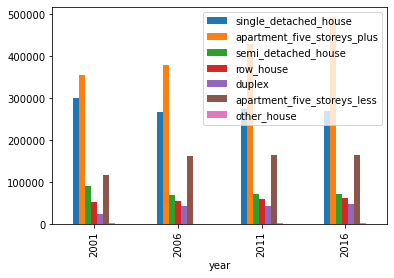

In [50]:
dwelling_grp_types.plot.bar()

In [56]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
 
 # create a barplot based in the data argument.
    fig = plt.figure()
    plot = data.plot.bar(title = title, color = color)
    plot.set_xlabel(str(xlabel))
    plot.set_ylabel(str(ylabel))
    #plt.show()
    

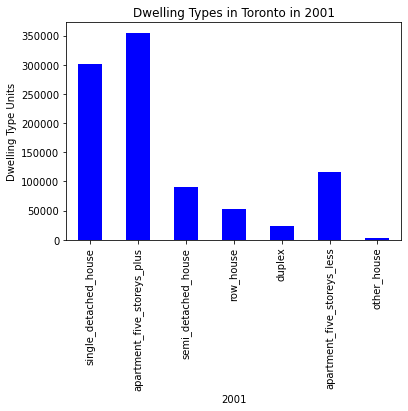

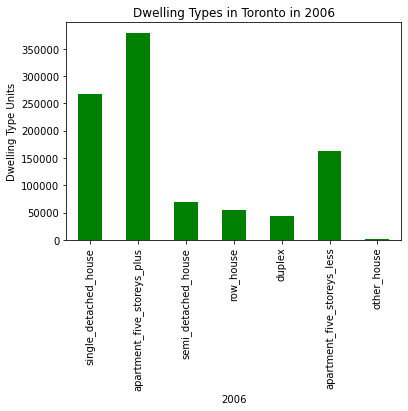

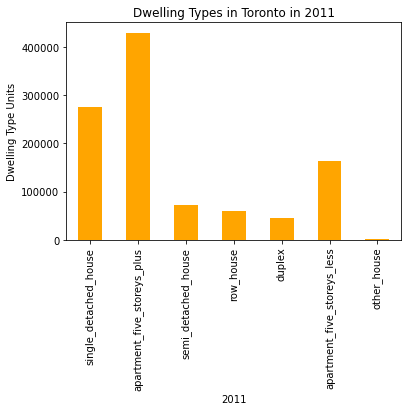

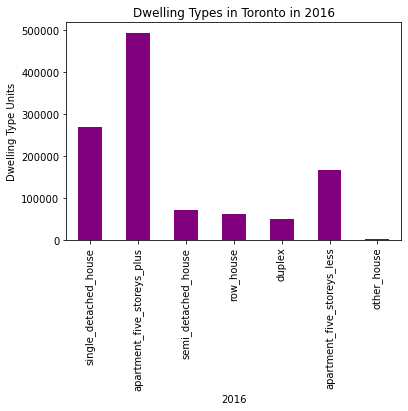

In [58]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2001
dwelling_type_2001 = create_bar_chart(dwelling_grp_types.loc[2001],
                 "Dwelling Types in Toronto in 2001", 
                 "2001", 
                 "Dwelling Type Units", 
                 "blue")

# Bar chart for 2006

dwelling_type_2006 = create_bar_chart(dwelling_grp_types.loc[2006],
                 "Dwelling Types in Toronto in 2006", 
                 "2006", 
                 "Dwelling Type Units", 
                 "green")
    
    #color={"2006": "blue"}

# Bar chart for 2011

dwelling_type_2011 = create_bar_chart(dwelling_grp_types.loc[2011],
                 "Dwelling Types in Toronto in 2011", 
                 "2011", 
                 "Dwelling Type Units", 
                 "orange")

    
    #color={"2011: "orange"}
           
# Bar chart for 2016

dwelling_type_2016 = create_bar_chart(dwelling_grp_types.loc[2016],
                 "Dwelling Types in Toronto in 2016", 
                 "2016", 
                 "Dwelling Type Units", 
                 "purple")           

    #color={"2016: "purple"}

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [59]:
# Calculate the average monthly shelter costs for owned and rented dwellings
housing_cost = to_data.groupby(['year']).mean().round(2)

monthly_shelter_costs_owned = housing_cost.iloc[:,-2]

monthly_shelter_costs_rented = housing_cost.iloc[:,-1]


monthly_shelter_costs_owned.head()

year
2001     846.88
2006    1316.80
2011    1448.21
2016    1761.31
Name: shelter_costs_owned, dtype: float64

In [60]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    fig = plt.figure()
    plot_line = data.plot.line(title = title, color = color)
    plot_line.set_xlabel(str(xlabel))
    plot_line.set_ylabel(str(ylabel))
    plt.show()

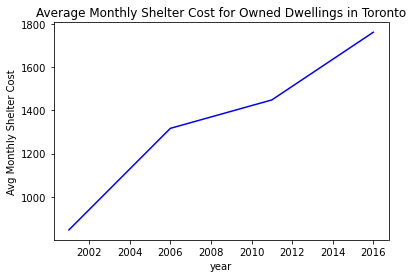

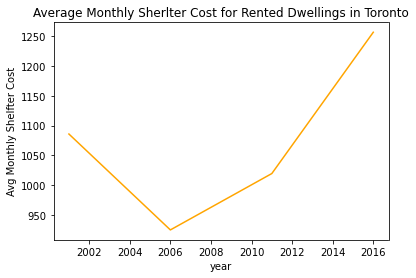

In [61]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(
    monthly_shelter_costs_owned, 
    'Average Monthly Shelter Cost for Owned Dwellings in Toronto',
    'year','Avg Monthly Shelter Cost',
    'blue')

# Line chart for rented dwellings
create_line_chart(
    monthly_shelter_costs_rented, 
    'Average Monthly Sherlter Cost for Rented Dwellings in Toronto',
    'year',
    'Avg Monthly Shelfter Cost',
    'orange')

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [62]:
# Calculate the average house value per year
average_house_value = to_data.groupby('year')[['average_house_value']].mean().round(2)

average_house_value

,average_house_value
year,
2001,289882.89
2006,424059.66
2011,530424.72
2016,664068.33


<Figure size 432x288 with 0 Axes>

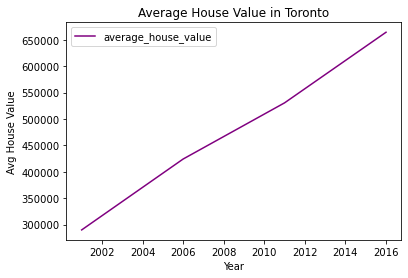

In [66]:
# Plot the average house value per year as a line chart
plot = create_line_chart(data= average_house_value, title='Average House Value in Toronto', 
                          xlabel="Year", ylabel= 'Avg House Value', color= 'purple')
plot

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [67]:
# Create a new DataFrame with the mean house values by neighbourhood per year
new_df = to_data.groupby([to_data.index,'neighbourhood']).mean()

neighbourhood_df = new_df[["average_house_value"]].reset_index()
neighbourhood_df.head()

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388.0
1,2001,Agincourt South-Malvern West,203047.0
2,2001,Alderwood,259998.0
3,2001,Annex,453850.0
4,2001,Banbury-Don Mills,371864.0


In [70]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
plot = create_line_chart(data= new_df, title= 'Average House Value per Neighbourhood', groupby='neighbourhood',
                        xlabel= 'Year', ylabel= 'Average House Value')
plot

TypeError: create_line_chart() got an unexpected keyword argument 'groupby'

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [71]:
# Fetch the data of all dwelling types per year
dwelling_types_df = to_data.drop(columns=["average_house_value", "shelter_costs_owned", "shelter_costs_rented"])

#dwelling_types_df.groupby(["year", "neighbourhood"]).head()
#dwelling_types_df.head()
#dwelling_types_df.groupby(['year']).mean().round(0)
dwelling_types_df

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2001,Alderwood,3175,315,0,470,50,185,370,0
2001,Annex,1060,6090,5,1980,605,275,3710,165
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0


In [16]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [72]:
# Getting the data from the top 10 expensive neighbourhoods
top_ten_most_expensive_neighbourhoods = to_data.groupby('neighbourhood').mean().sort_values(by= 'average_house_value', ascending=False).head(10)
top_ten_most_expensive_neighbourhoods.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Bridle Path-Sunnybrook-York Mills,2260.00,331.25,0.00,36.25,90.00,25.0,40.00,0.00,1526485.75,2360.75,2321.75
Forest Hill South,1742.50,2031.25,1.25,61.25,45.00,75.0,1027.50,3.75,1195992.50,1781.00,1313.75
Lawrence Park South,3472.50,773.75,0.00,126.25,38.75,225.0,966.25,16.25,1094027.75,1954.00,1372.75
Rosedale-Moore Park,2498.75,4641.25,0.00,486.25,245.00,327.5,1618.75,2.50,1093640.00,1909.75,1537.25
St.Andrew-Windfields,3225.00,1670.00,0.00,185.00,552.50,97.5,586.25,5.00,999107.00,1880.25,1384.50


In [73]:
# Plotting the data from the top 10 expensive neighbourhoods
top_ten_most_expensive_neighbourhoods.hvplot.bar(
        x = "neighbourhood",
        y = "average_house_value",
        xlabel = "Neighbourhood",
        ylabel = "Average house value",
        title = "Top 10 expensive neighbourhoods", height = 400, rot = 45).opts(yformatter="%.0f"
)

AttributeError: 'Document' object has no attribute '_hold'

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [79]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.set_index("neighbourhood", inplace = True)
df_neighbourhood_locations.head()

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [80]:
# Calculate the mean values for each neighborhood
mean_value_neighbourhood = to_data.groupby("neighbourhood").mean()

mean_value_neighbourhood.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


In [81]:
# Join the average values with the neighbourhood locations
mean_value_location = pd.concat([df_neighbourhood_locations, mean_value_neighbourhood], axis="columns", join="inner").reset_index()

mean_value_location.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [82]:
# Create a scatter mapbox to analyze neighbourhood info
px.scatter_mapbox(
    mean_value_location,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="year",
    title="Average house value for each neighbourhood"
)

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['neighbourhood', 'lat', 'lon', 'single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house', 'average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'] but received: year

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

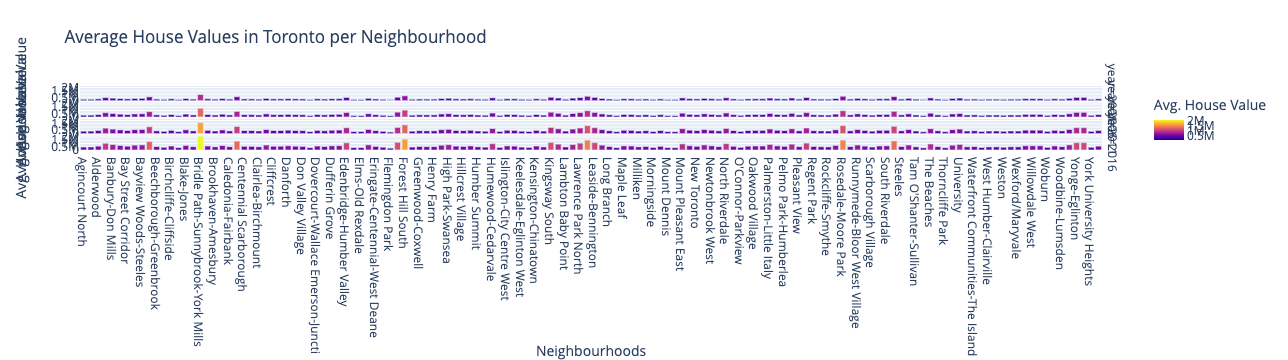

In [23]:
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [24]:
# Fetch the data from all expensive neighbourhoods per year.
# YOUR CODE HERE!

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15,565304,933,1491
1,2001,Bridle Path-Sunnybrook-York Mills,2275,110,0,25,15,10,20,0,927466,1983,1790
2,2001,Casa Loma,1035,1700,0,415,190,185,1090,5,596077,1241,1500
3,2001,Forest Hill North,1565,3380,0,10,0,0,485,5,517466,940,1428
4,2001,Forest Hill South,1815,2440,5,65,45,85,1010,15,726664,1001,1469


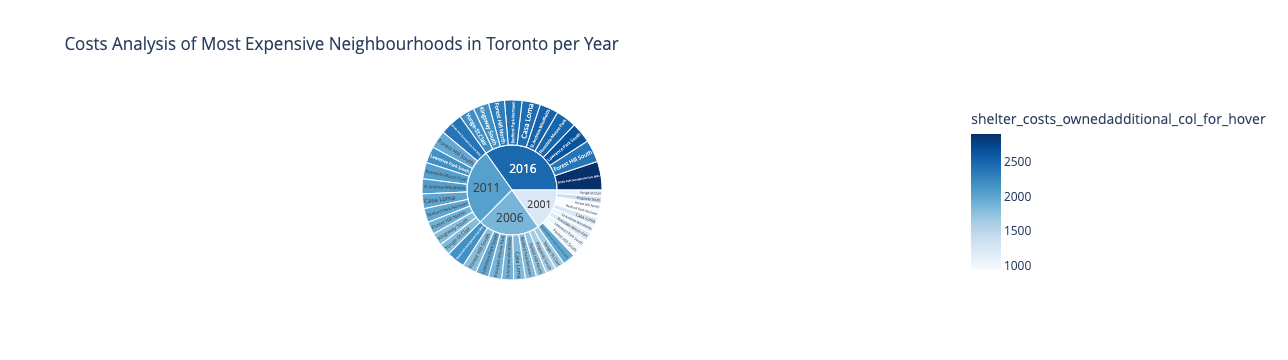

In [25]:
# Create the sunburst chart
# YOUR CODE HERE!